# A Game of Thrones tutorial

Game of Thrones (GoT) is an American fantasy drama TV series, created by D. Benioff and D.B. Weiss for the American television network HBO. It is the screen adaption of the series of fantasy novels *A Song of Ice and Fire*, written by George R.R. Martin. The series premiered on HBO in the United States on April 17, 2011, and concluded on May 19, 2019, with 73 episodes broadcast over eight seasons. With its 12 million viewers during season 8 and a plethora of awards---according to [Wikipedia](https://en.wikipedia.org/wiki/Game_of_Thrones), Game of Thrones has attracted record viewership on HBO and has a broad, active, and international fan base. 

The intricate world narrated by George R.R. Martin and scripted by Benioff and Weiss has stimulated the curiosity of ranks of scientists, delighted by the opportunity to study complex social phenomena. In this notebook, we delve into the study of GoT relationships to discover what the hypergraphs they generate reveal about the story.

In this notebook, we replicate some of the analysis you can read in our paper at this [link](https://www.internetmathematicsjournal.com/article/12464-analyzing-exploring-and-visualizing-complex-networks-via-hypergraphs-using-simplehypergraphs-jl)!

## What we need... installing and loading packages

In [ ]:
] add PyCall Conda SimpleHypergraphs PyPlot

#### Prerequisites for plotting

In [ ]:
using PyCall
using Conda

Conda.runconda(`install matplotlib --yes`)
Conda.runconda(`install networkx --yes`)
run(`$(PyCall.python) -m pip install hypernetx`)

In [46]:
using SimpleHypergraphs
using PyPlot

## The data set
This study is based on the dataset at the GitHub repository of Jeffrey Lancaster [Game of Thrones Datasets and Visualizations](https://github.com/jeffreylancaster/game-of-thrones). We will thus focus on the GoT TV series.

We studied GoT characters' co-occurrences with different levels of granularity. We modeled the GoT data set building three different types of hypergraphs, each one reporting whether the GoT characters have appeared in the same **season**, in the same **episode**, or in the same **scene** together.

## Hypergraph with each *season* as an edge

First, we load a hypergraph studying characters' co-occurences within seasons. Here, the hyperedges are the GoT seasons and the characters who appear in each eason are the nodes.

In [29]:
h = SimpleHypergraphs.hg_load("data/hg_seasons_all.json"; format=JSON_Format(), T=Bool, V=Symbol, E=Symbol);

In [30]:
# how many characters did we see during the overall TV series?
size(h)[1]

577

In [39]:
# how many characters does each season have?
# we can ask this way...
map(he -> println("Season $he has $(length(getvertices(h, he))) characters"), 1:nhe(h));

Season 1 has 125 characters
Season 2 has 137 characters
Season 3 has 137 characters
Season 4 has 152 characters
Season 5 has 175 characters
Season 6 has 208 characters
Season 7 has 75 characters
Season 8 has 66 characters


In [44]:
# ... or this way
length.(h.he2v)

8-element Array{Int64,1}:
 125
 137
 137
 152
 175
 208
  75
  66

**SimpleHypergraphs** integates the Python library **HyperNetX** to let the user visualize a hypergraph `h` exploiting an Euler-diagram visualization. For more details, please refer to the library [HyperNetX](https://github.com/pnnl/HyperNetX).

In [83]:
# Let's visualize (a smaller parte of) the hypergraph we built
# To build this smaller hypergraph, we considered only those characters 
# appearing at least in 10 scenes in the whole series
h1 = SimpleHypergraphs.hg_load("data/hg_seasons_min.json"; format=JSON_Format(), T=Int, V=Symbol, E=Symbol);

In [91]:
map(he -> 
    println("Season $he has *$(length(getvertices(h1, he)))* characters appearing in at least 10 scenes"), 
    1:nhe(h));

Season 1 has *69* characters appearing in at least 10 scenes
Season 2 has *74* characters appearing in at least 10 scenes
Season 3 has *83* characters appearing in at least 10 scenes
Season 4 has *83* characters appearing in at least 10 scenes
Season 5 has *75* characters appearing in at least 10 scenes
Season 6 has *98* characters appearing in at least 10 scenes
Season 7 has *56* characters appearing in at least 10 scenes
Season 8 has *44* characters appearing in at least 10 scenes


In [87]:
length.(h1.he2v)

8-element Array{Int64,1}:
 69
 74
 83
 83
 75
 98
 56
 44

In [88]:
# viz params: edge labels
edge_labels = Dict{Int, String}(map(x -> x=>"S$x", 1:nhe(h)))
edge_labels_kwargs = Dict{String,Any}("fontsize" => "x-large")
;

In [89]:
# viz params: figure
width = 3
height = 3
fig = plt.figure(figsize=[width,height])
;

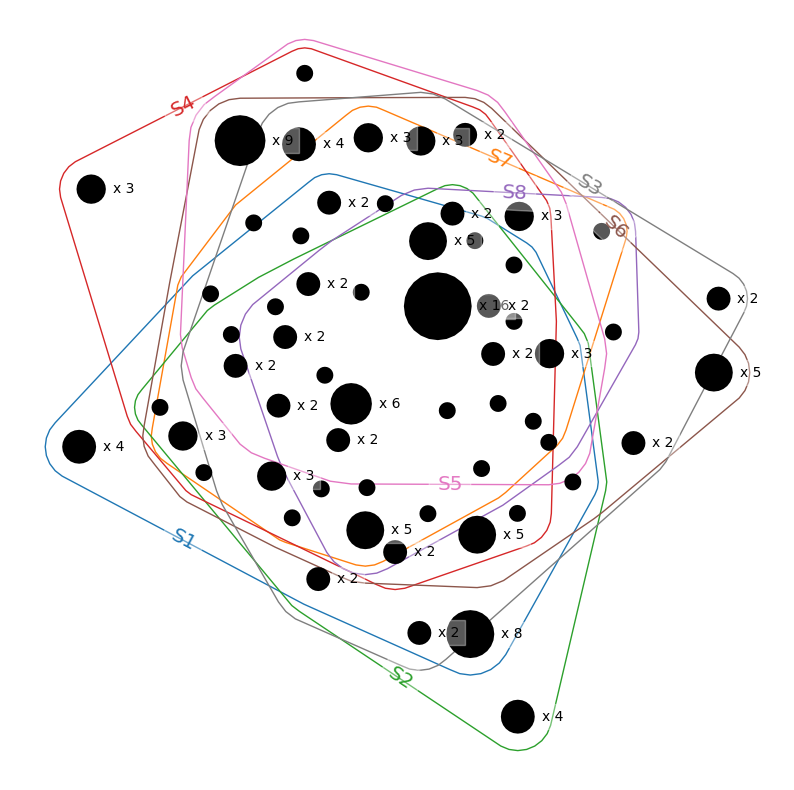

In [90]:
SimpleHypergraphs.draw(
    h1, 
    HyperNetX;
    no_border=true,
    collapse_nodes=true, 
    with_node_counts=true, 
    with_node_labels=true,
    edge_labels=edge_labels, 
    edge_labels_kwargs=edge_labels_kwargs
)

In [110]:
# who are the characters appearing in all 8 seasons?
most_important_character_ids = findall(x->x==1, (length.(h.v2he) .== 8))

for id in most_important_character_ids
    println(SimpleHypergraphs.get_vertex_meta(h, id))
end

White_Walker
Jon_Snow
Sansa_Stark
Arya_Stark
Theon_Greyjoy
Cersei_Lannister
Jaime_Lannister
Tyrion_Lannister
Daenerys_Targaryen
Jorah_Mormont
Drogon
Rhaegal
Viserion
Lord_Varys
Samwell_Tarly
Bronn


## Hypergraph with each scene as an edge

In [111]:
# Let's have a closer look of what's happening in season 8
h8 = SimpleHypergraphs.hg_load("data/hg_season8.json"; format=JSON_Format(), T=Bool, V=Symbol, E=Symbol);

In [118]:
# how many characters do we have? How many scenes?
"$(nhv(h8)) characters and $(nhe(h8)) scenes"

"66 characters and 871 scenes"

### The collaboration structure of Game of Thrones.

In [138]:
cfmr = CFModularityRandom(3,10000)

bp, bm = findcommunities(h8, cfmr)

(bp = Set{Int64}[Set([47, 54, 40, 16, 62, 11, 26, 25, 10, 34  …  55, 58, 19, 17, 60, 64, 8, 38, 20, 33]), Set([50, 39, 21, 46, 7, 9, 43, 42, 29, 66  …  24, 53, 61, 5, 57, 63, 27, 48, 56, 1]), Set([30, 41, 52, 32, 2, 65, 49, 51, 6, 44  …  28, 45, 23, 13, 14, 31, 36, 15, 12, 18])], bm = 0.10262489932627197)

In [139]:
bp

3-element Array{Set{Int64},1}:
 Set([47, 54, 40, 16, 62, 11, 26, 25, 10, 34  …  55, 58, 19, 17, 60, 64, 8, 38, 20, 33])
 Set([50, 39, 21, 46, 7, 9, 43, 42, 29, 66  …  24, 53, 61, 5, 57, 63, 27, 48, 56, 1])   
 Set([30, 41, 52, 32, 2, 65, 49, 51, 6, 44  …  28, 45, 23, 13, 14, 31, 36, 15, 12, 18]) 